# To do 
1) save plots,
2) add break point parts,
3) add statistical test analysis.

# Market Indices

In [7]:
#!/usr/bin/env python3.10.4
import sys
import datetime as dt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_market_calendars as mcal
sys.path.append('../lib/')
from functions import *

In [41]:
# Stok indices
# Retrieve financial data for indices from "https://finance.yahoo.com/world-indices"
# ^GSPC: Standard and Poor's 500
# ^DJI: Dow Jones Industrial Index
# ^IXIC: NASDAQ_Composite
# ^RUT: Russel 2000
# S&P 500 (^SPX) options: https://finance.yahoo.com/quote/%5ESPX/options?p=%5ESPX

In [42]:
# Set end date
end = dt.datetime.now()
# Set start date (1 year distance)
start = end - dt.timedelta(weeks=52)

# To evaluate the difference between the dates in terms of business days.
print(f'Days between dates: {(end - start).days} days')

nyse = mcal.get_calendar('NYSE')
bizdays = nyse.valid_days(start_date=start, end_date=end)

print(f'Business days between dates: {len(bizdays)} days')

Days between dates: 364 days
Business days between dates: 253 days


In [43]:
# We concentrate on the Standard and Poor's 500 Index
GSPC_df = read_data_from_yahoo('^GSPC', start, end)
GSPC_df['Date'] = pd.to_datetime(GSPC_df['Date'],
                                 format='%Y-%m-%d').dt.strftime('%d-%m-%Y')

# rate of return
r = GSPC_df['Adj Close'].diff(periods=1) / GSPC_df['Adj Close'].to_numpy()
GSPC_df

,Date,High,Low,Open,Close,Volume,Adj Close
0,12-04-2021,4131.759766,4114.819824,4124.709961,4127.990234,3578500000,4127.990234
1,13-04-2021,4148.000000,4124.430176,4130.100098,4141.589844,3728440000,4141.589844
2,14-04-2021,4151.689941,4120.870117,4141.580078,4124.660156,3976540000,4124.660156
3,15-04-2021,4173.490234,4139.759766,4139.759766,4170.419922,4027680000,4170.419922
4,16-04-2021,4191.310059,4170.750000,4174.140137,4185.470215,4157430000,4185.470215
...,...,...,...,...,...,...,...
248,04-04-2022,4583.500000,4539.209961,4547.970215,4582.640137,3833500000,4582.640137
249,05-04-2022,4593.450195,4514.169922,4572.450195,4525.120117,3906230000,4525.120117
250,06-04-2022,4503.939941,4450.040039,4494.169922,4481.149902,4137080000,4481.149902
251,07-04-2022,4521.160156,4450.299805,4474.649902,4500.209961,4054010000,4500.209961


We concentrate on the Standard and Poor's 500 Index.
<br> In case, we also remove the last row, which appears to be essentially a repetition of the penultimate row.

In [44]:
# Compute the logarithm return for each index dataframe
GSPC_df = log_return(GSPC_df)

GSPC_df

,Date,High,Low,Open,Close,Volume,Adj Close,y_lr,y_plr
0,13-04-2021,4148.000000,4124.430176,4130.100098,4141.589844,3728440000,4141.589844,0.003289,0.328907
1,14-04-2021,4151.689941,4120.870117,4141.580078,4124.660156,3976540000,4124.660156,-0.004096,-0.409610
2,15-04-2021,4173.490234,4139.759766,4139.759766,4170.419922,4027680000,4170.419922,0.011033,1.103310
3,16-04-2021,4191.310059,4170.750000,4174.140137,4185.470215,4157430000,4185.470215,0.003602,0.360232
4,19-04-2021,4180.810059,4150.470215,4179.799805,4163.259766,3788020000,4163.259766,-0.005321,-0.532069
...,...,...,...,...,...,...,...,...,...
247,04-04-2022,4583.500000,4539.209961,4547.970215,4582.640137,3833500000,4582.640137,0.008058,0.805838
248,05-04-2022,4593.450195,4514.169922,4572.450195,4525.120117,3906230000,4525.120117,-0.012631,-1.263116
249,06-04-2022,4503.939941,4450.040039,4494.169922,4481.149902,4137080000,4481.149902,-0.009764,-0.976443
250,07-04-2022,4521.160156,4450.299805,4474.649902,4500.209961,4054010000,4500.209961,0.004244,0.424437


Intercept: 4247.006519423172, Index: 1.458170037974631


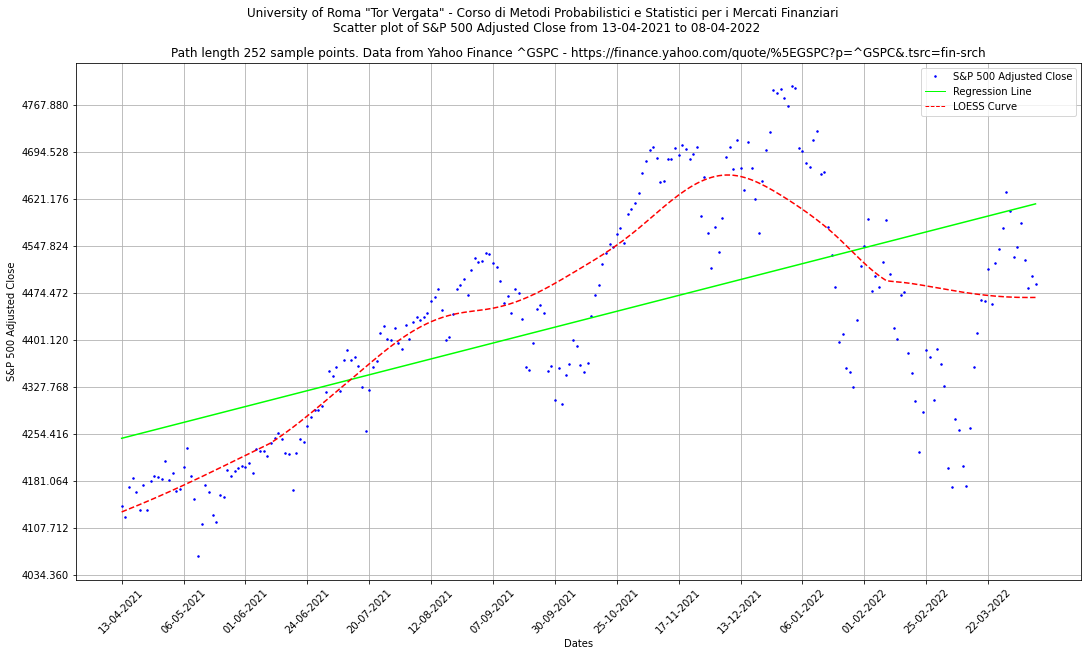

In [45]:
# Hence, we plot the GSPC adjusted close
link = "https://finance.yahoo.com/quote/%5EGSPC?p=^GSPC&.tsrc=fin-srch"
data_visualization(GSPC_df, kind='scatter', symbol='^GSPC',
                   link=link, column='Adj Close')

Intercept: 4247.006519423172, Index: 1.458170037974631


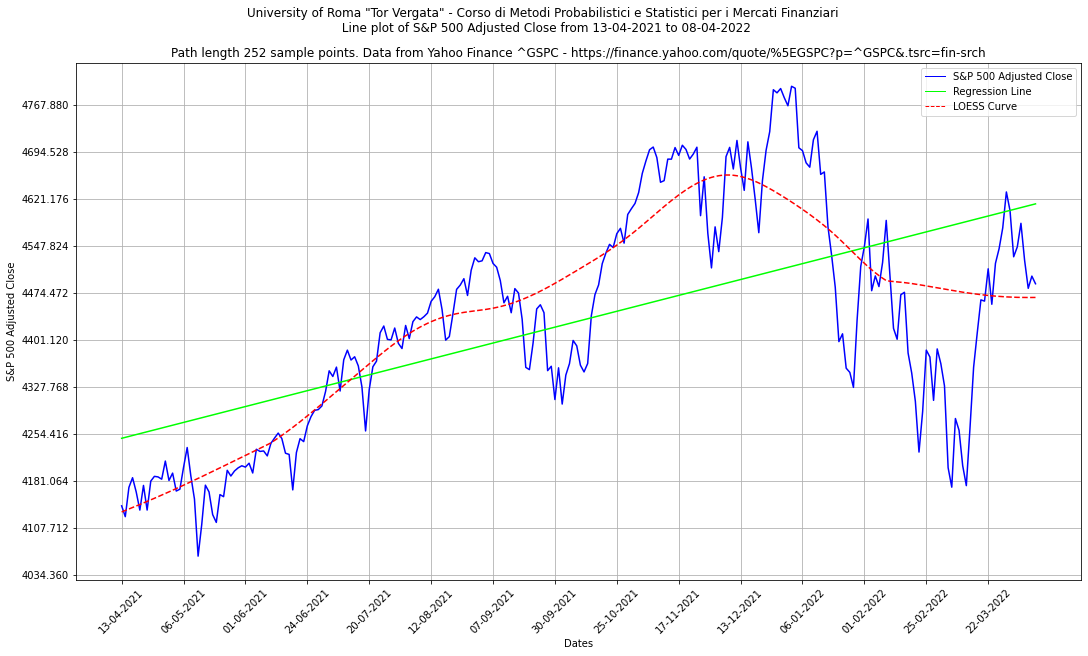

In [46]:
data_visualization(GSPC_df, kind='line', symbol='^GSPC',
                   link=link, column='Adj Close')

Intercept: 0.09913772310458445, Index: -0.0005253532463729292


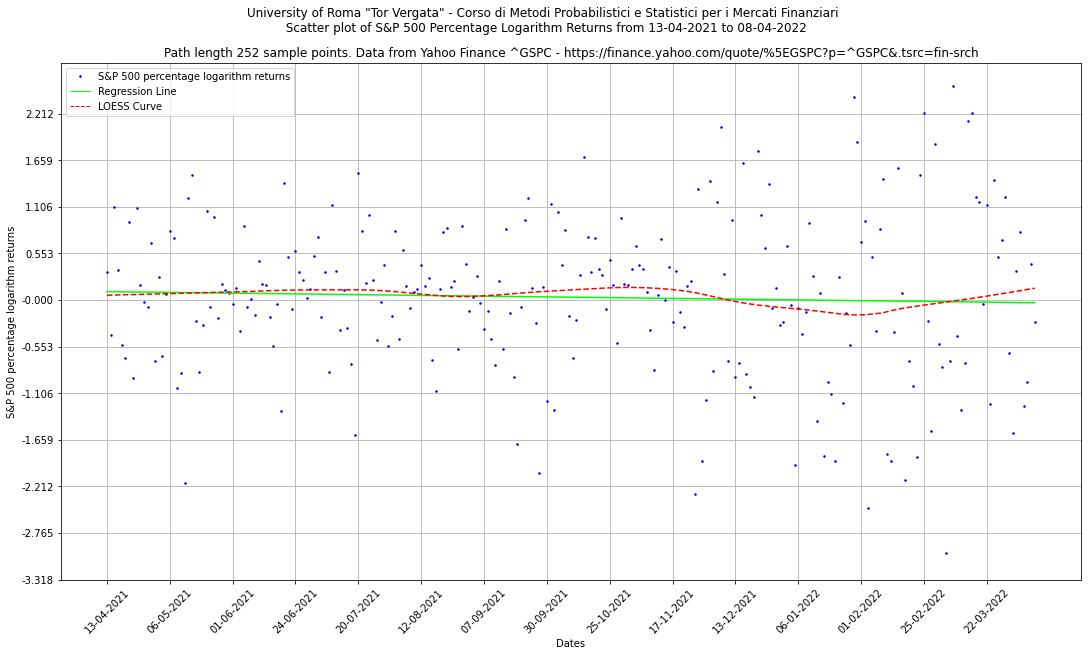

In [47]:
data_visualization(GSPC_df, kind='scatter', symbol='^GSPC',
                   link=link, column='y_plr')

Intercept: 0.09913772310458445, Index: -0.0005253532463729292


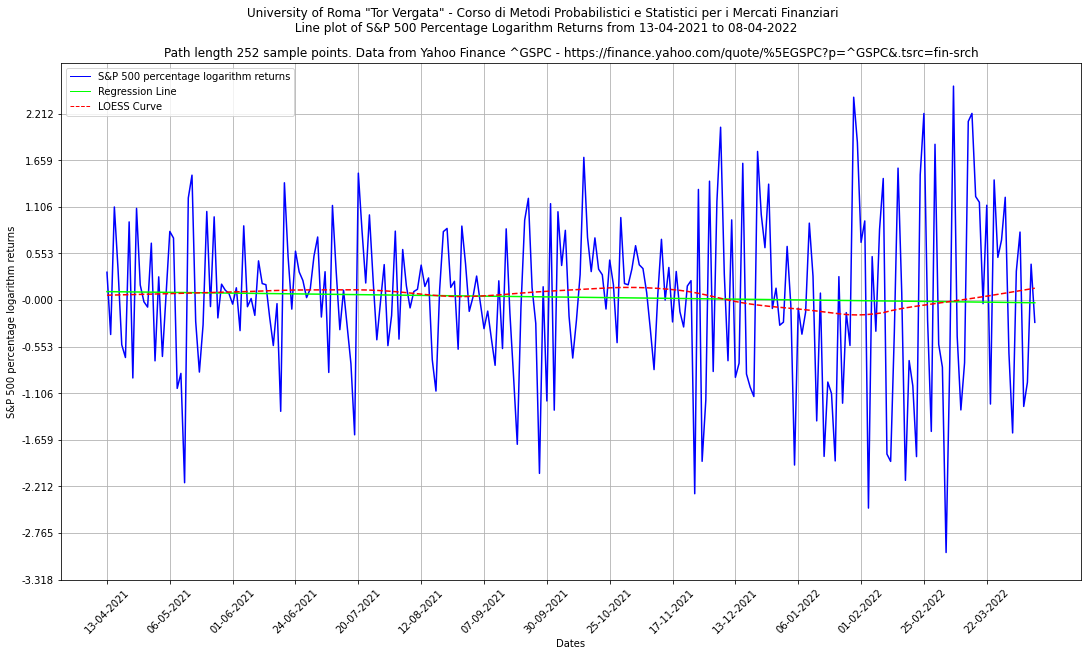

In [48]:
data_visualization(GSPC_df, kind='line', symbol='^GSPC',
                   link=link, column='y_plr')

Autocorrelogram

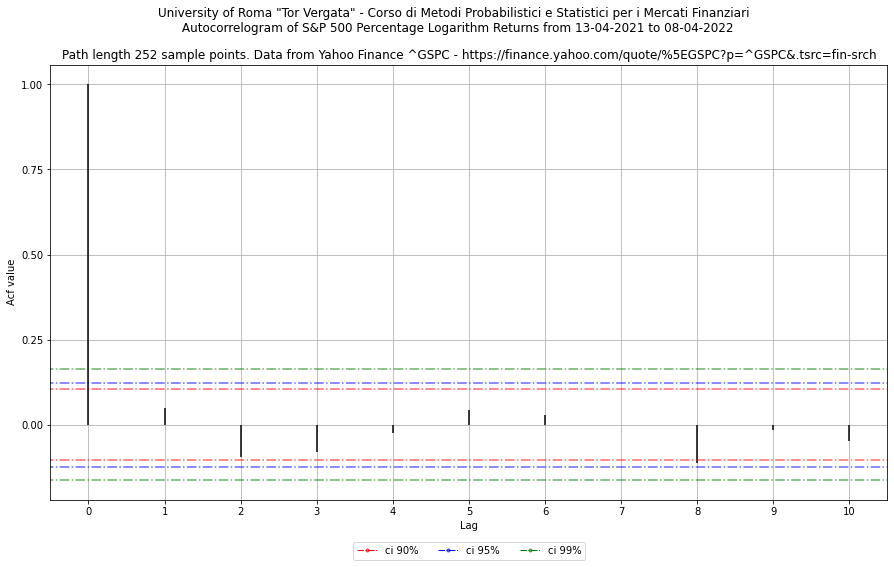

In [49]:
autocorrelogram(GSPC_df, link=link, symbol='^GSPC')

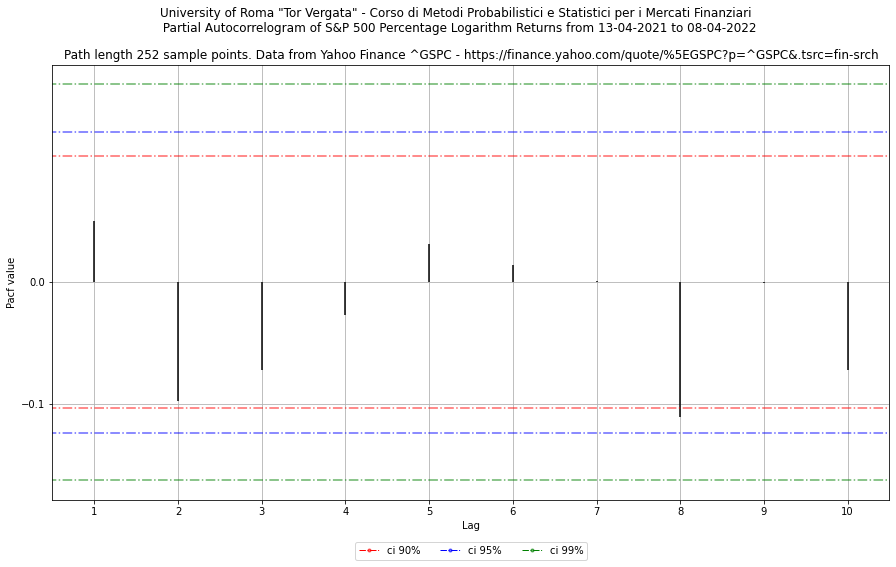

In [50]:
autocorrelogram(GSPC_df, partial=True, link=link, symbol='^GSPC')

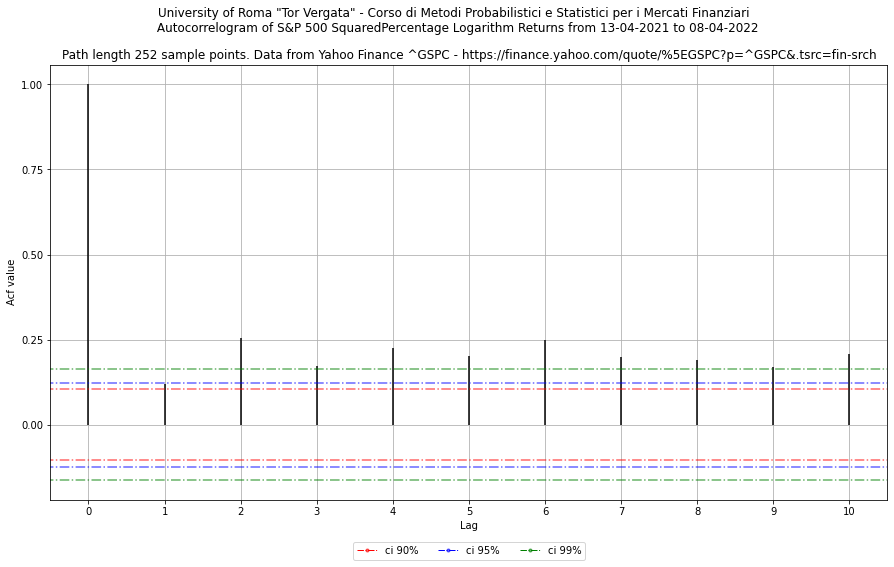

In [51]:
autocorrelogram(GSPC_df, link=link, squared=True, symbol='^GSPC')